<a href="https://colab.research.google.com/github/Samadarshi-Maity/Overlapped_Particle_Detection/blob/main/Generate__Random_Images_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code to generate Random dots based images for training a CNN

1. Create randon number of particles scattered in the x and Y.
2. Convert the scatter plot into .png images
2. The generated images do not have any scaling issue which occurs during the conversion of scatter plots into full blown images  


In [1]:
# import some necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random

if not os.path.exists('Imagefolder'):
  os.mkdir('Imagefolder')
from tqdm import tqdm

In [2]:
# define the frame dimensions
X_frames = 64
Y_frames = 64

# measure typical number density
Packing_fraction  = 0.7
total_Area  = X_frames*Y_frames
particle_radius =  22.5/1300*64

N = total_Area/(np.pi*particle_radius**2)
N

1062.6048546184813

In [3]:
# generate a number between these values
num_circles = 25

In [4]:
# how many circles will be present
X = np.array([random.randint(-450,450) for i in range(round(num_circles))])/10000
Y =np.array( [random.randint(-450,450) for i in range(round(num_circles))])/10000

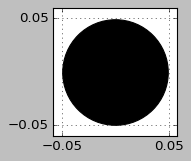

In [5]:
plt.style.use('classic')
plt.figure(figsize = (2,2))
ax = plt.axes()
ax.axis('equal')
plt.scatter(0,0, c = 'k', s =95**2)
plt.xticks([-0.05, 0.05])
plt.yticks([-0.05, 0.05])
plt.grid()
plt.savefig('test.pdf',bbox_inches = 'tight')

# circle size scaling laws for the scatter plot.

for figure at 1,1 the there are 71 units radially for a axis range of 0 to 0.05 set using x ticks and y ticks

figsize*dpi =  necessary pixels for our image


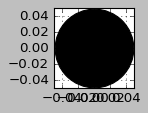

In [6]:
# STANDARD FOR THE COMPUTATION FO THE CIRCLE DIMENSION
fig = plt.figure(figsize = (1,1))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.axis('equal')
#ax.set_axis_off()
fig.add_axes(ax)
plt.scatter(0,0, c = 'k', s = (70.7)**2)
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])
plt.grid()
plt.savefig('check.png', dpi=64)

### Adding real paricle to box scaling


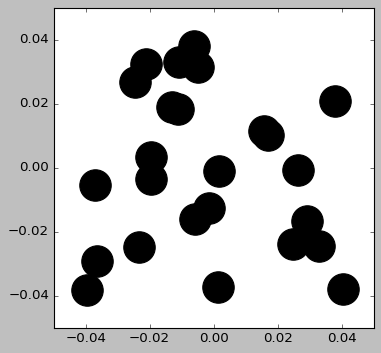

In [7]:
PtoB_ratio = 0.1
PtoB_ratio

scale_ = 4
fig = plt.figure(figsize = (scale_, scale_))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.axis('equal')
#ax.set_axis_off()
fig.add_axes(ax)
plt.scatter(X,Y, c = 'k', s = (PtoB_ratio*scale_*70.7)**2)
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])
plt.savefig('check.png', dpi=128/scale_)

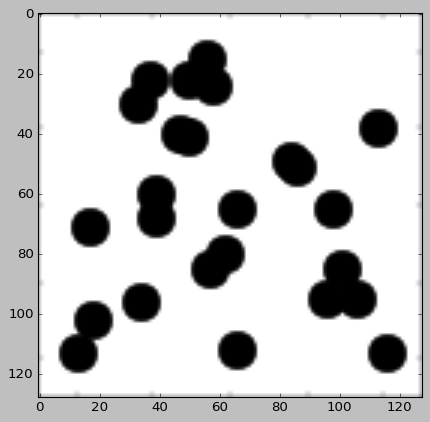

In [8]:
A = plt.imread('check.png')
plt.imshow(A)

In [54]:
# define a function that will generate the images for you

def image_generator(outpath_path, image_size, N_particles, PtoB_ratio=0.1, packing_frac = 0.5):
  '''
  Generates N images of a specificed size in . format
  '''
  # define the frame dimensions
  X_frames = image_size[0]
  Y_frames = image_size[1]

  # for the grids that will be later made
  xedges =  np.linspace(-X_frames/2, X_frames/2, X_frames+1)
  yedges =  np.linspace(-Y_frames/2, Y_frames/2, Y_frames+1)

  # measure typical number density
  Packing_fraction  = packing_frac

  # define the particle to box ratio
  PtoB_ratio = PtoB_ratio

  # generate a number between these values
  num_circles = N_particles

  # create a smapling list a bit smaller than the image dimensions
  length_rand = int(np.floor(X_frames/10)*10)
  print(length_rand)
  random_list_ = sorted(np.unique(np.array(np.linspace(-length_rand/2, length_rand/2, length_rand), dtype = int)))

  # pick for the list
  Xx = random.sample(random_list_, num_circles)
  Yy = random.sample(random_list_, num_circles)

  # scale the coorinates to the correct size
  X = np.array(Xx)/X_frames*1000/10000
  Y = np.array(Yy)/Y_frames*1000/10000
  scale_ = 4

  # develop the image with consistent dimensions
  fig = plt.figure(figsize = (scale_, scale_))
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.axis('equal')
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.scatter(X,Y, c = 'k', s = (PtoB_ratio*scale_*70.7)**2)
  plt.xlim([-0.05, 0.05])
  plt.ylim([-0.05, 0.05])
  plt.savefig(outpath_path+'.png', dpi=X_frames/scale_)
  plt.close()

  # check for duplicates
  # duplicates can cause problems with the output
  data_check = pd.DataFrame({'X':Xx, 'Y':Yy})
  data_check.sort_values(by = ['X'])
  vall1 = data_check.groupby('X')['Y'].count()
  vall2 = data_check.groupby('X')['Y'].nunique()
  dupli = np.sum(vall1.values- vall2.values)

  # now create the simul;ated response
  H, xedges, yedges = np.histogram2d(Yy, Xx, bins=(xedges, yedges))

  return Xx,Yy, dupli, np.flipud(H)

In [55]:
X_, Y_, d_, H = image_generator('abcd', [128, 128],5, PtoB_ratio=0.05, packing_frac = 0.5)
xedges =  np.linspace(-64, 64, 128+1)
yedges =  np.linspace(-64, 64, 128+1)

120


(0.0, 128.0)

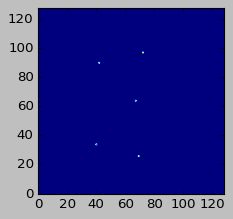

In [56]:
plt.figure(figsize = (3,3))
# now create the simul;ated response
H_, xedges, yedges = np.histogram2d(Y_, X_, bins=(xedges, yedges))
plt.imshow(H)
plt.xlim([0,128])
plt.ylim([0,128])

(0.0, 128.0)

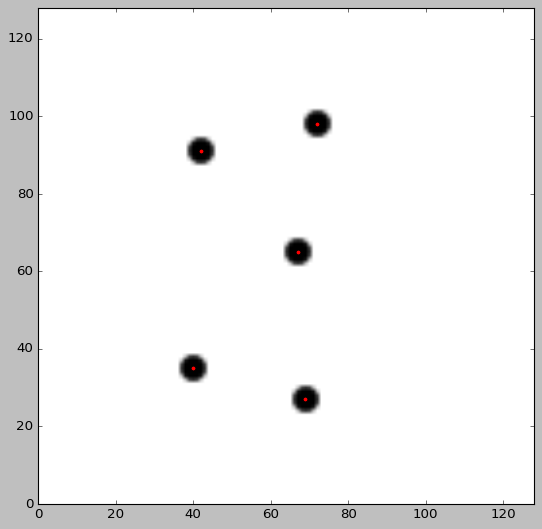

In [57]:
plt.figure(figsize = (8,8))
A = plt.imread('abcd.png')
plt.imshow(A, cmap = 'Greys_r')
plt.scatter(np.array(X_)+ 64, 128 - (np.array(Y_)+ 64), c = 'r', s = 20)
plt.xlim([0,128])

plt.ylim([0,128])

In [13]:
# create a for loop for geerating the images

N_images = 100
def gen_path(folder, N_images):
  '''
  This function is used to create path list for the images
  '''
  path_list = [(folder + str(n).zfill(6) +'.png') for n in range(N_images)]
  return path_list

In [14]:
 N_images = 100

name_list = gen_path(r'/content/Imagefolder//', N_images)
X_list = []
Y_list = []
for n in range(N_images):
  X_, Y_ = image_generator(name_list[n], [128, 128],100, PtoB_ratio=0.05, packing_frac = 0.5)
  X_list.append(X_)
  Y_list.append(Y_)

ValueError: too many values to unpack (expected 2)